
##**JAMBOREE ADMISSION PREDICTOR**


**Problem Statement:**

The main aim of this project is to predict the likelihood of a student securing admission into top Ivy League universities abroad based on their academic and profile attributes such as GRE score, TOEFL score, SOP, LOR, CGPA, and research experience. The project analyzes how these predefined factors collectively influence the probability of admission and identifies the key elements that significantly impact a student’s chances of getting admitted.

#**Exploratory Data Analysis(EDA):**

In [1]:
# Importing the modules for working with dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Uploading the dataset.
df = pd.read_csv("/content/Jamboree_Admission.csv")

In [3]:
# Checking Top 10 rows for analyse the dataset.
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Observation:

The dataset contains profiles of students who applied to various universities through Jamboree Education. Each record includes academic parameters such as GRE score, TOEFL score, CGPA, and qualitative measures like SOP and LOR ratings. The University Rating column represents the reputation or difficulty level of the university assigned by Jamboree’s experts, on a scale from 1 (low) to 5 (high). This rating helps understand how a student’s academic profile aligns with the selectivity of the university. The Research column indicates whether the student has prior research experience. The target variable, Chance of Admit is a probability ranging from 0 to 1.



In [4]:
# Checking the rows and cols with help of shape.
df.shape

(500, 9)

-- No of Rows = 500

-- No of Cols = 9

In [5]:
# Checking Feature columns.
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
# Droping Unwanted columns from the dataset.
df.drop('Serial No.',axis=1,inplace=True)

-- "Serial No" is a unwated column in the dataset, so we dropped that column.

In [7]:
# After dropping unwanted columns/features, checking the dataset.
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# Again checking no.of rows/cols.
df.shape

(500, 8)

In [9]:
# Checking the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
# Describing the dataset w r t central tendencies.
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Observations:**

 **GRE Score:** The GRE scores range approximately from 290 to 340, with the median around 317 and most values concentrated between 308 (25th percentile) and 325 (75th percentile). This shows that most applicants have competitive GRE scores.

 **TOEFL Score:** TOEFL scores are mostly between 100 and 115, with a median of 107. This indicates that students generally have strong English proficiency.

 **CGPA:** CGPA values lie mostly between 8.1 and 9.0, with the median around 8.56. This suggests that the dataset consists primarily of academically strong students.

 **University Rating, SOP, and LOR:** These features center around values of 3 to 4, indicating that applicants generally present moderate to strong profiles rather than extreme weak or exceptional cases.

 **Research:** The dataset contains both research and non-research students, with a slight majority having research experience.

 **Chance of Admit:** The admission probability ranges roughly from 0.34 to 0.97, with many values clustered above 0.6, meaning most applicants have a moderate-to-high chance of admission.


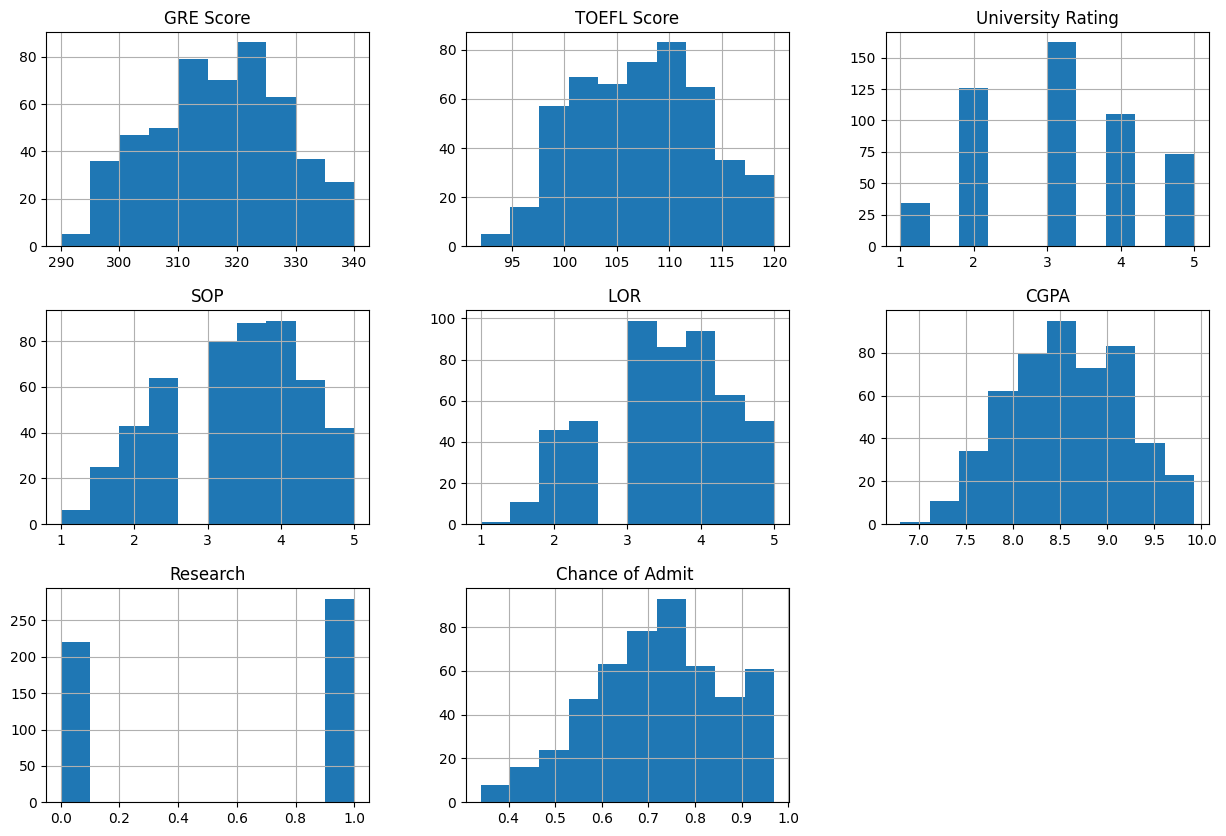

In [11]:
# Checking all features histplots for their distribution.
df.hist(figsize=(15,10))
plt.show()

**Histogram Observations:**

-- GRE Scores are normally distributed, most students scored between 300 and 330, and very few below 290 or above 335.

-- TOEFL Scores are also normally distributed, majority of students scored between 100 and 115, and very few below 95.

-- University Rating is slightly right-skewed, most students applied to universities rated 3 and 4, very few applied to rating 1 or 5.

-- SOP (Statement of Purpose) scores are concentrated between 3 and 4.5, showing most students gave average to good SOPs.

-- LOR (Letter of Recommendation) scores follow a similar pattern, mostly between 3 and 4.5, with fewer weak or exceptional ones.

-- CGPA distribution is slightly left-skewed, with most students scoring high (8.0 to 9.5) and fewer low-CGPA cases.

-- Research feature is binary, showing a clear split between students with research (1) and without research (0). Slightly more students have research experience.

-- Chance of Admit is positively skewed, most students have probabilities between 0.6 and 0.9, meaning majority have a moderate to high chance of getting admission.

#**Univariate Analysis:**

In [12]:
df['CGPA']

,CGPA
0,9.65
1,8.87
2,8.00
3,8.67
4,8.21
...,...
495,9.02
496,9.87
497,9.56
498,8.43


In [13]:
# It gives count of each unique category.
df['CGPA'].value_counts()

,count
CGPA,
8.00,9
8.76,9
8.56,7
8.12,7
8.45,7
...,...
7.57,1
7.21,1
9.27,1


In [14]:
# Gives percentage distribution of CGPA
df['CGPA'].value_counts(normalize=True)*100

,proportion
CGPA,
8.00,1.8
8.76,1.8
8.56,1.4
8.12,1.4
8.45,1.4
...,...
7.57,0.2
7.21,0.2
9.27,0.2


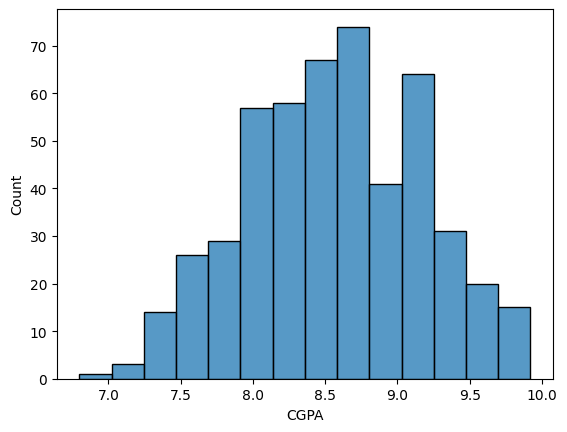

In [15]:
# Checking distribution plot for the CGPA.
sns.histplot(df['CGPA'])
plt.show()

**Observation:**

CGPA concentrates between 8.0 and 9.5 with relatively few low values. Skew is mild and not a modeling concern.

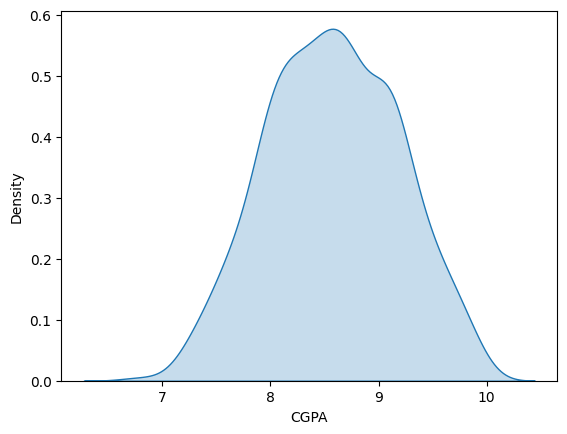

In [16]:
sns.kdeplot(df['CGPA'],fill=True)
plt.show()

**Observation:**

The KDE plot for CGPA shows a single clear peak around 8.5 to 9.0, confirming most students have strong academic performance. The curve is slightly right-skewed, meaning fewer students have very low CGPA, and the distribution is concentrated in the higher range.

In [17]:
df['GRE Score']

,GRE Score
0,337
1,324
2,316
3,322
4,314
...,...
495,332
496,337
497,330
498,312


In [18]:
# Returns array of unique categories.
df['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293])

In [19]:
# Returns no of unique categories.
df['GRE Score'].nunique()

49

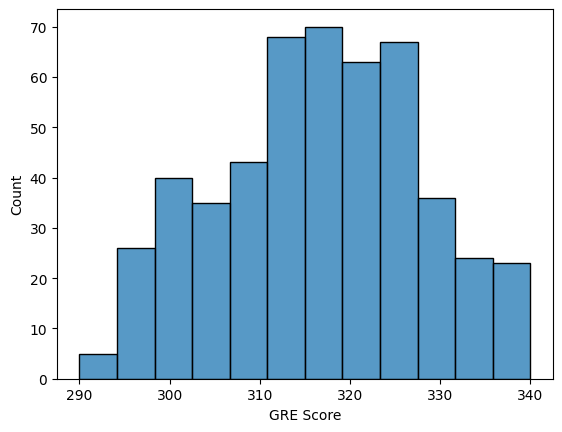

In [20]:
# Checking distribution plot for the GRE Score.
sns.histplot(df['GRE Score'])
plt.show()

**Observation:**

The GRE Score distribution appears nearly normal. Most students scored between 300 and 330, indicating average to high performance. Very few students scored below 295 or above 335, showing that the majority of students fall within a consistent GRE range.

In [21]:
df['TOEFL Score']

,TOEFL Score
0,118
1,107
2,104
3,110
4,103
...,...
495,108
496,117
497,120
498,103


In [22]:
# Returns no of unique categories.
df['TOEFL Score'].nunique()

29

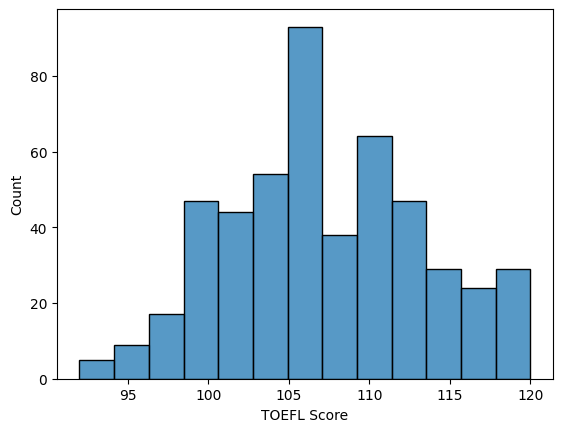

In [23]:
# Checking distribution plot for the TOEFL Score.
sns.histplot(df['TOEFL Score'])
plt.show()

**Observation:**

The TOEFL Score distribution is nearly normal, with most students scoring between 100 and 115. Very few students scored below 95 or above 115, indicating that most students have strong English proficiency levels.

In [24]:
df['University Rating']

,University Rating
0,4
1,4
2,3
3,3
4,2
...,...
495,5
496,5
497,5
498,4


In [25]:
df['University Rating'].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


**Observation:**

Most of the students applied to universities rated 3, followed by those rated 4. Very few students applied to universities rated 1 or 5, indicating that the majority of applicants target mid- to top-tier universities.

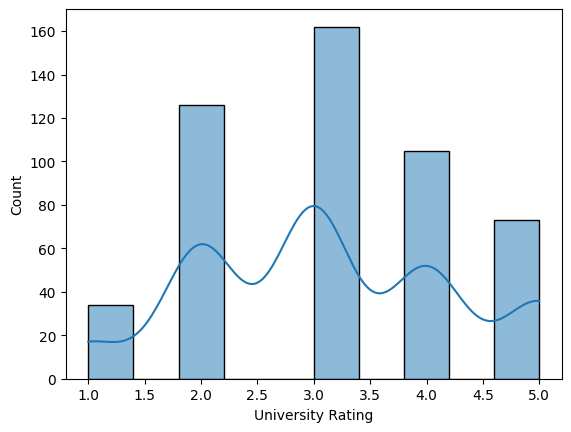

In [26]:
# Checking distribution plot for the University Rating.
sns.histplot(df['University Rating'],kde=True)
plt.show()

**Observation:**

The University Rating distribution shows a clear peak around 3, confirming that most students applied to universities with a rating of 3. The smooth curve gradually decreases toward ratings 1 and 5, indicating fewer applications at both extremes.

In [27]:
df['SOP']

,SOP
0,4.5
1,4.0
2,3.0
3,3.5
4,2.0
...,...
495,4.5
496,5.0
497,4.5
498,4.0


In [28]:
df['SOP'].value_counts()

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


**Observation:**

Most students have SOP ratings between 3.0 and 4.5, indicating that the majority of applicants have written moderately strong statements of purpose. Very few students have SOP ratings of 1.0 or 2.0, showing that weak SOPs are uncommon in this dataset.

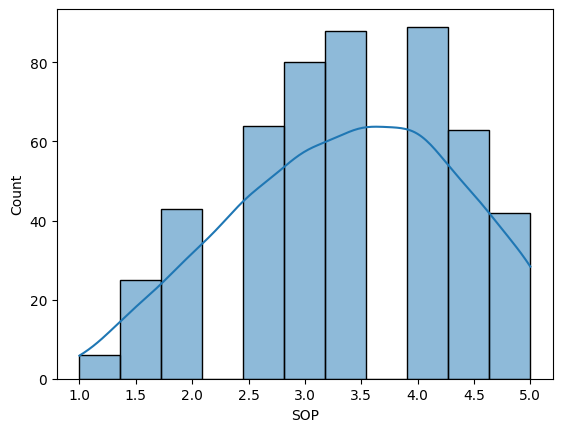

In [29]:
# Checking distribution plot for the SOP.
sns.histplot(df['SOP'],kde=True)
plt.show()

**Observation:**

The SOP distribution shows most students having ratings between 3.0 and 4.5, with a clear peak around 3.5. Very few students have SOP ratings below 2.0, indicating that most applicants have submitted fairly strong statements of purpose.

In [30]:
df['LOR ']

,LOR
0,4.5
1,4.5
2,3.5
3,2.5
4,3.0
...,...
495,4.0
496,5.0
497,5.0
498,5.0


<Axes: xlabel='LOR '>

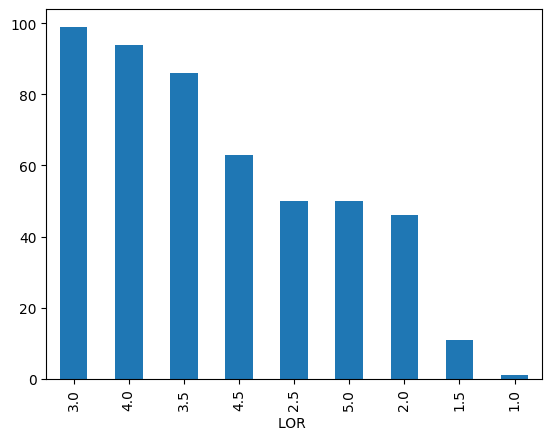

In [31]:
df['LOR '].value_counts().plot(kind='bar')

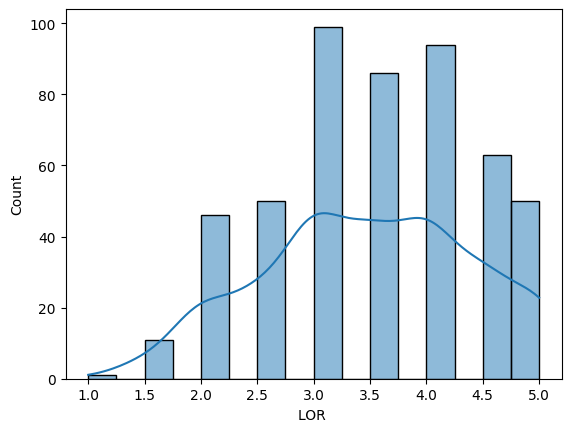

In [32]:
# Checking distribution plot for the LOR.
sns.histplot(df['LOR '],kde=True)
plt.show()

**Observation:**

Both the bar plot and histogram indicate that most students have LOR ratings around 3.0, meaning they received average-quality recommendation letters. Very few students received weak (below 2.0) or excellent (above 4.5) ratings.

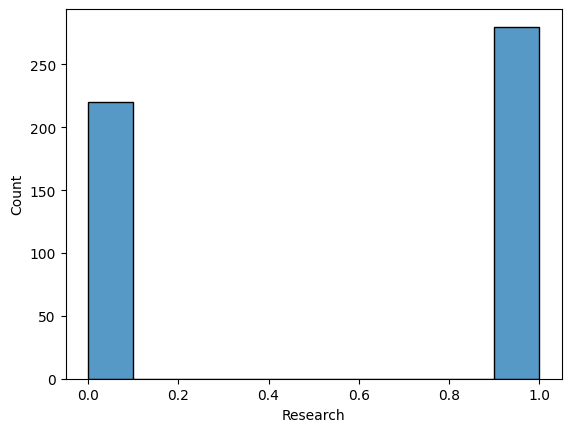

In [33]:
# Checking the distribution of the Research column
sns.histplot(df['Research'])
plt.show()


**Observation:**

The histogram of the Research column shows two distinct bars — one at 0 and another at 1. Most students have research experience (1) compared to those without (0), indicating that a greater number of applicants have participated in research activities.

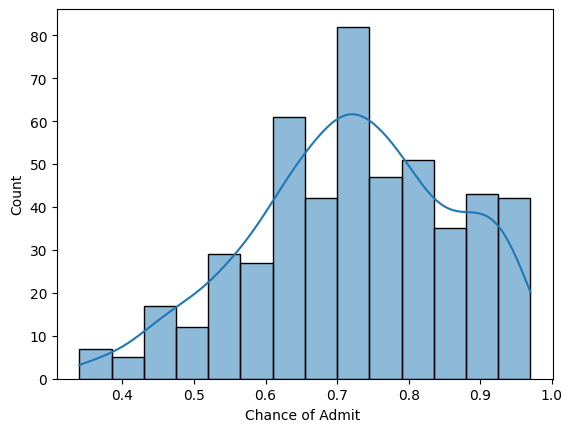

In [34]:
## Checking the distribution of the Chance of Admit.
sns.histplot(df['Chance of Admit '],kde=True)
plt.show()

**Observation:**

The distribution of Chance of Admit is right-skewed, with most students having an admission chance between 0.6 and 0.9. Very few students have a low admission probability below 0.5, indicating that the majority of applicants in the dataset have a moderate to high likelihood of getting admission.

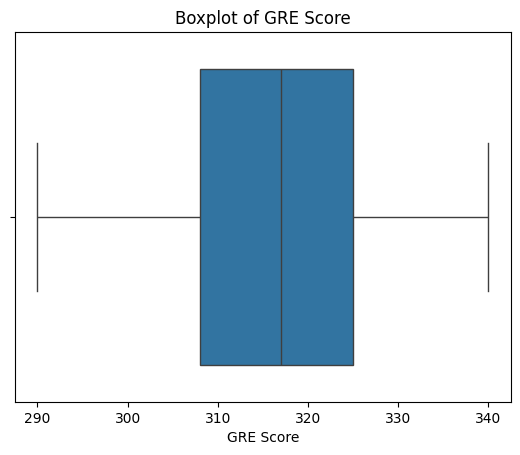

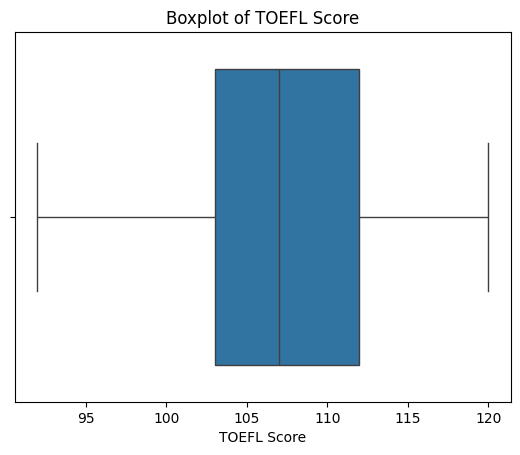

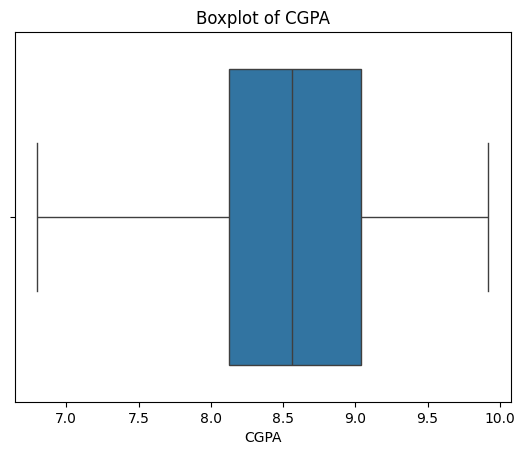

In [35]:
# Checking if any outliers affecting the distribution.
sns.boxplot(x=df['GRE Score'])
plt.title('Boxplot of GRE Score')
plt.show()

sns.boxplot(x=df['TOEFL Score'])
plt.title('Boxplot of TOEFL Score')
plt.show()

sns.boxplot(x=df['CGPA'])
plt.title('Boxplot of CGPA')
plt.show()

**Observation:**

The boxplot does not show significant outliers, indicating that the values are reasonably distributed and suitable for model building.

#**Univariate Analysis Summary:**

Univariate analysis was performed on all the features to understand their individual distributions and patterns.

-- GRE Score, TOEFL Score, and CGPA showed nearly normal distributions, where most students scored in the higher ranges, indicating strong academic performance.

-- University Rating, SOP, and LOR were concentrated between 3.0 and 4.0, showing that students generally applied to moderate to highly reputed universities with average-to-good supporting documents.

-- The Research column, being binary, showed that slightly more students have prior research experience (1) compared to those who do not (0).

-- The Chance of Admit column was right-skewed, with most students having an admission probability between 0.6 and 0.9, indicating that the majority of applicants have a moderate to high chance of admission.

Overall, the dataset shows a positive trend, where most students demonstrate strong academic and profile strengths.

# **Bivariate Analysis:**

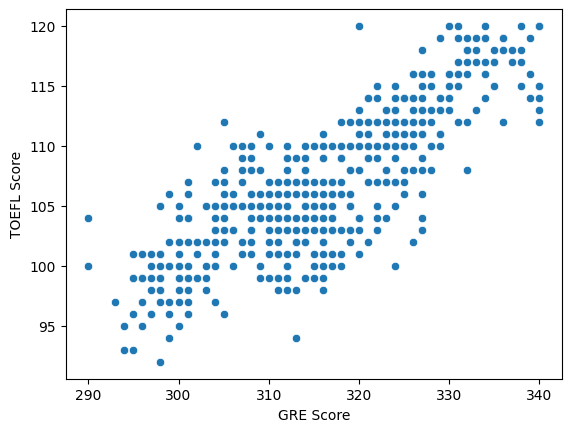

In [36]:
# Relationship between GRE & TOEFL Scores.
sns.scatterplot(data=df,x='GRE Score',y='TOEFL Score')
plt.show()

**Observation:**

As GRE Score increasing the TOEFL Score also increasing, Maintaining a positive correlation.

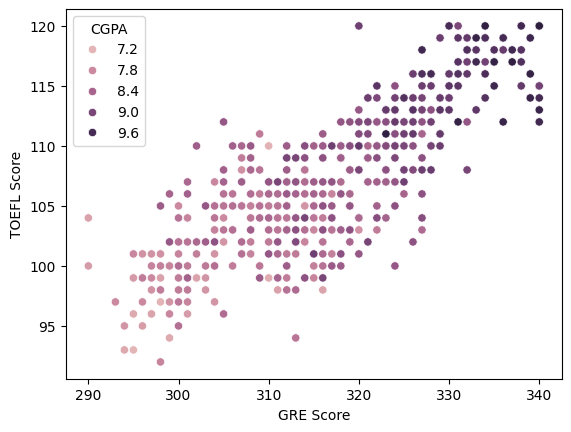

In [37]:
# Checking how GRE and TOEFL scores relate together, and how CGPA varies across them.
sns.scatterplot(data=df,x='GRE Score',y='TOEFL Score',hue='CGPA')
plt.show()

**Observation:**

The scatterplot shows a clear positive relationship between GRE Score and TOEFL Score, meaning students who score high in one tend to score high in the other. The CGPA (hue) intensifies towards the top-right region, indicating that students with higher GRE and TOEFL scores also generally have higher CGPA. This suggests that overall academic performance is consistent across these three features.

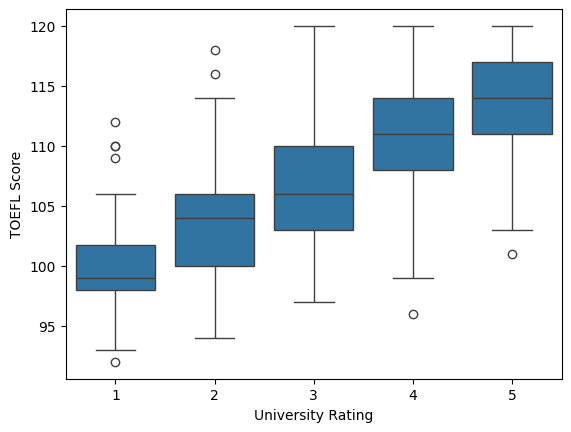

In [38]:
# Effect of University Rating on TOEFL Scores
sns.boxplot(data=df,x='University Rating',y='TOEFL Score')
plt.show()

**Observation:**


The boxplot shows that students applying to higher-rated universities generally have higher TOEFL scores. As the University Rating increases, the median TOEFL Score also increases. This indicates that students aiming for more reputed universities tend to have stronger English proficiency.

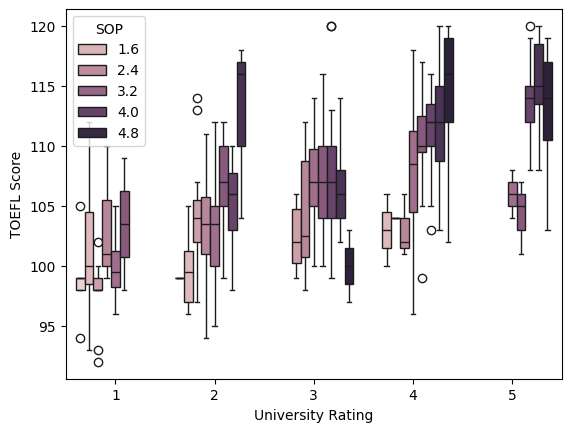

In [39]:
# Effect of SOP Strength within University Rating Groups
sns.boxplot(data=df,x='University Rating',y='TOEFL Score',hue='SOP')
plt.show()

**Observation:**

The boxplot shows that students who apply to higher-rated universities tend to have higher TOEFL scores. Additionally, within each University Rating group, students with higher SOP scores generally have higher TOEFL scores compared to those with lower SOP scores. This indicates that stronger English proficiency and well-written SOPs are often found together in applicants to more reputed universities.

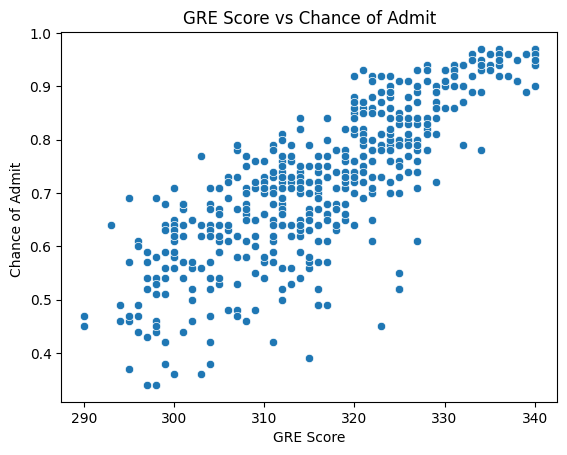

In [40]:
# Checking how GRE Score influences the admission chances.
sns.scatterplot(data=df, x='GRE Score', y='Chance of Admit ')
plt.title('GRE Score vs Chance of Admit')
plt.show()

**Observation:**

As GRE Score increases, the Chance of Admit also increases, showing a strong positive linear relationship.

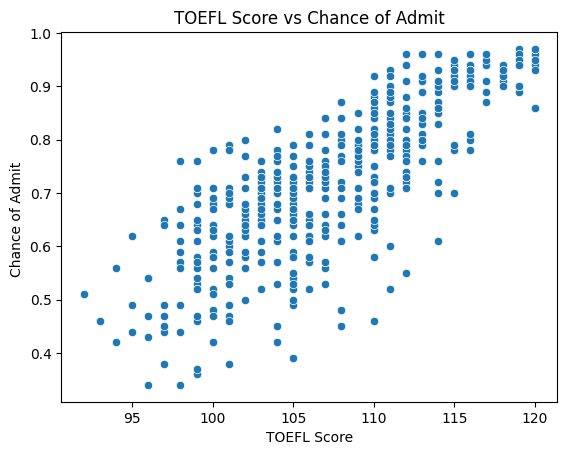

In [41]:
# Checking how TOEFL Score influences admission chances.
sns.scatterplot(data=df, x='TOEFL Score', y='Chance of Admit ')
plt.title('TOEFL Score vs Chance of Admit')
plt.show()

**Observation:**

Higher TOEFL Scores are associated with higher admission probability.

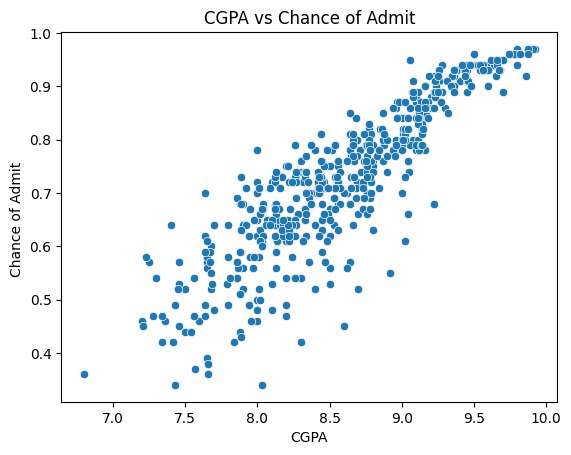

In [42]:
# Checking the effect of CGPA on admission chance
sns.scatterplot(data=df, x='CGPA', y='Chance of Admit ')
plt.title('CGPA vs Chance of Admit')
plt.show()

**Observation:**

CGPA shows the strongest positive relationship with Chance of Admit. Higher CGPA → significantly higher admission probability.

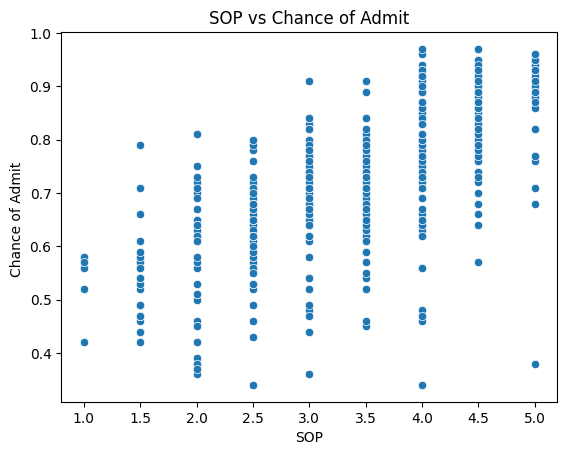

In [43]:
# Checking how SOP influences admission chance.
sns.scatterplot(data=df, x='SOP', y='Chance of Admit ')
plt.title('SOP vs Chance of Admit')
plt.show()

**Observation:**

SOP shows a moderate positive relationship — stronger SOPs slightly improve admission chances.

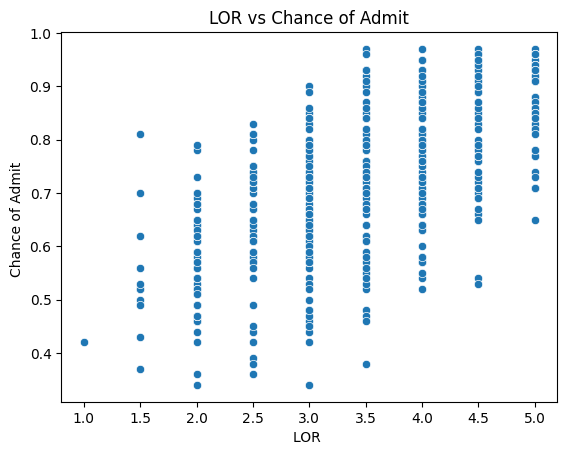

In [44]:
# Checking whether stronger recommendation letters help increase admission chances.
sns.scatterplot(data=df, x='LOR ', y='Chance of Admit ')
plt.title('LOR vs Chance of Admit')
plt.show()

**Observation:**


LOR also shows a moderate positive effect on admission chances.

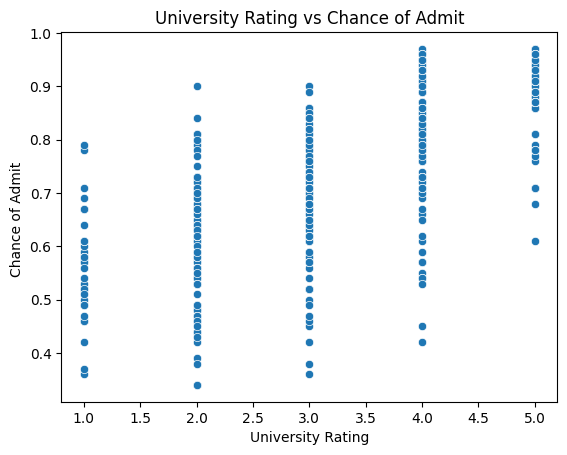

In [45]:
# Checking if university reputation influences admission probability
sns.scatterplot(data=df, x='University Rating', y='Chance of Admit ')
plt.title('University Rating vs Chance of Admit')
plt.show()

**Observation:**

Higher rated universities correspond to higher admission probability, but the relationship is less strong than CGPA/GRE.

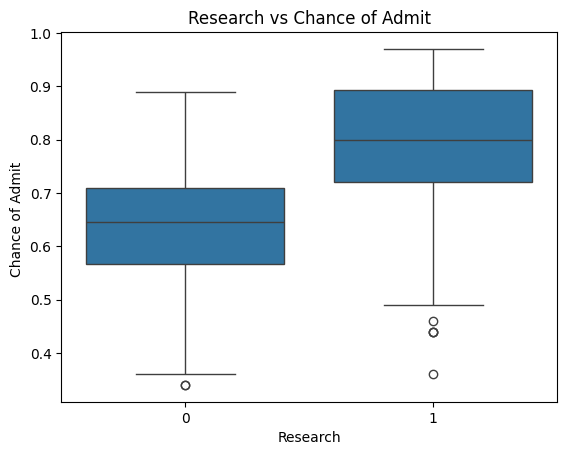

In [46]:
# Checking how research experience affects admission chance
sns.boxplot(data=df, x='Research', y='Chance of Admit ')
plt.title('Research vs Chance of Admit')
plt.show()

**Observation:**

Students with research experience have a noticeably higher chance of admission than those without.

**Bivariate Analysis Summary:**

Bivariate analysis was performed to understand how each feature influences the Chance of Admit.

-- GRE Score, TOEFL Score, and CGPA showed a strong positive relationship with Chance of Admit. As these academic scores increase, the probability of admission also increases.

-- SOP, LOR, and University Rating showed a moderate positive relationship with Chance of Admit, indicating that profile strength and university selection also contribute, but their impact is less compared to academic scores.

-- The Research feature showed that students with research experience (1) have a higher admission chance compared to those without (0).

Overall, the bivariate analysis confirms that academic performance is the primary factor influencing admission chances, while profile strength and research experience provide additional supportive impact.

# **Multivariate Analysis:**

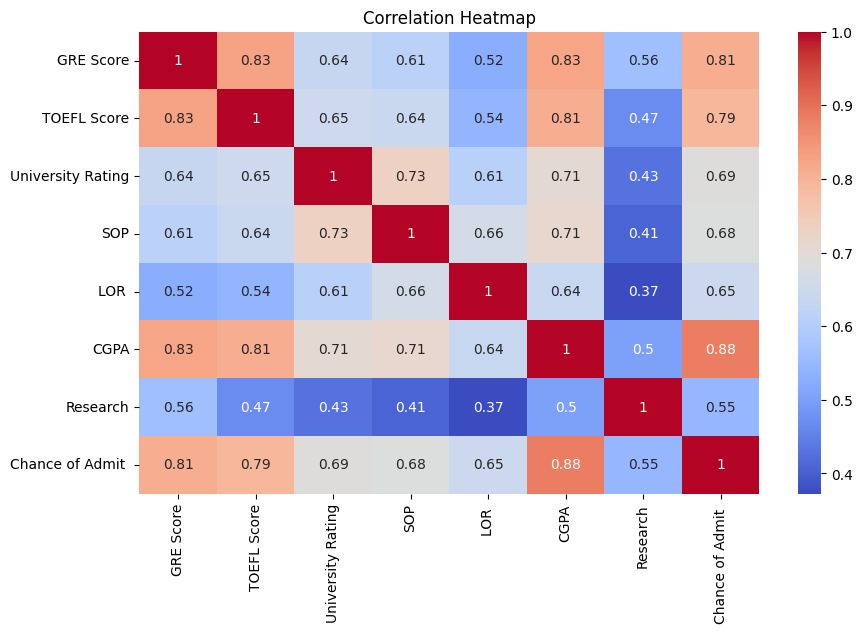

In [47]:
# Checking Correlation Heatmap for relationships between columns.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observation:**

-- CGPA, GRE Score, and TOEFL Score show strong positive correlation with Chance of Admit, meaning higher academic scores lead to higher admission chances.

-- University Rating, SOP, and LOR have moderate positive correlations, showing they also contribute but less strongly.

-- Research shows a positive correlation, indicating students with research experience generally have higher chances of admission.

-- No negative correlations are observed — all features contribute positively to the admission probability.

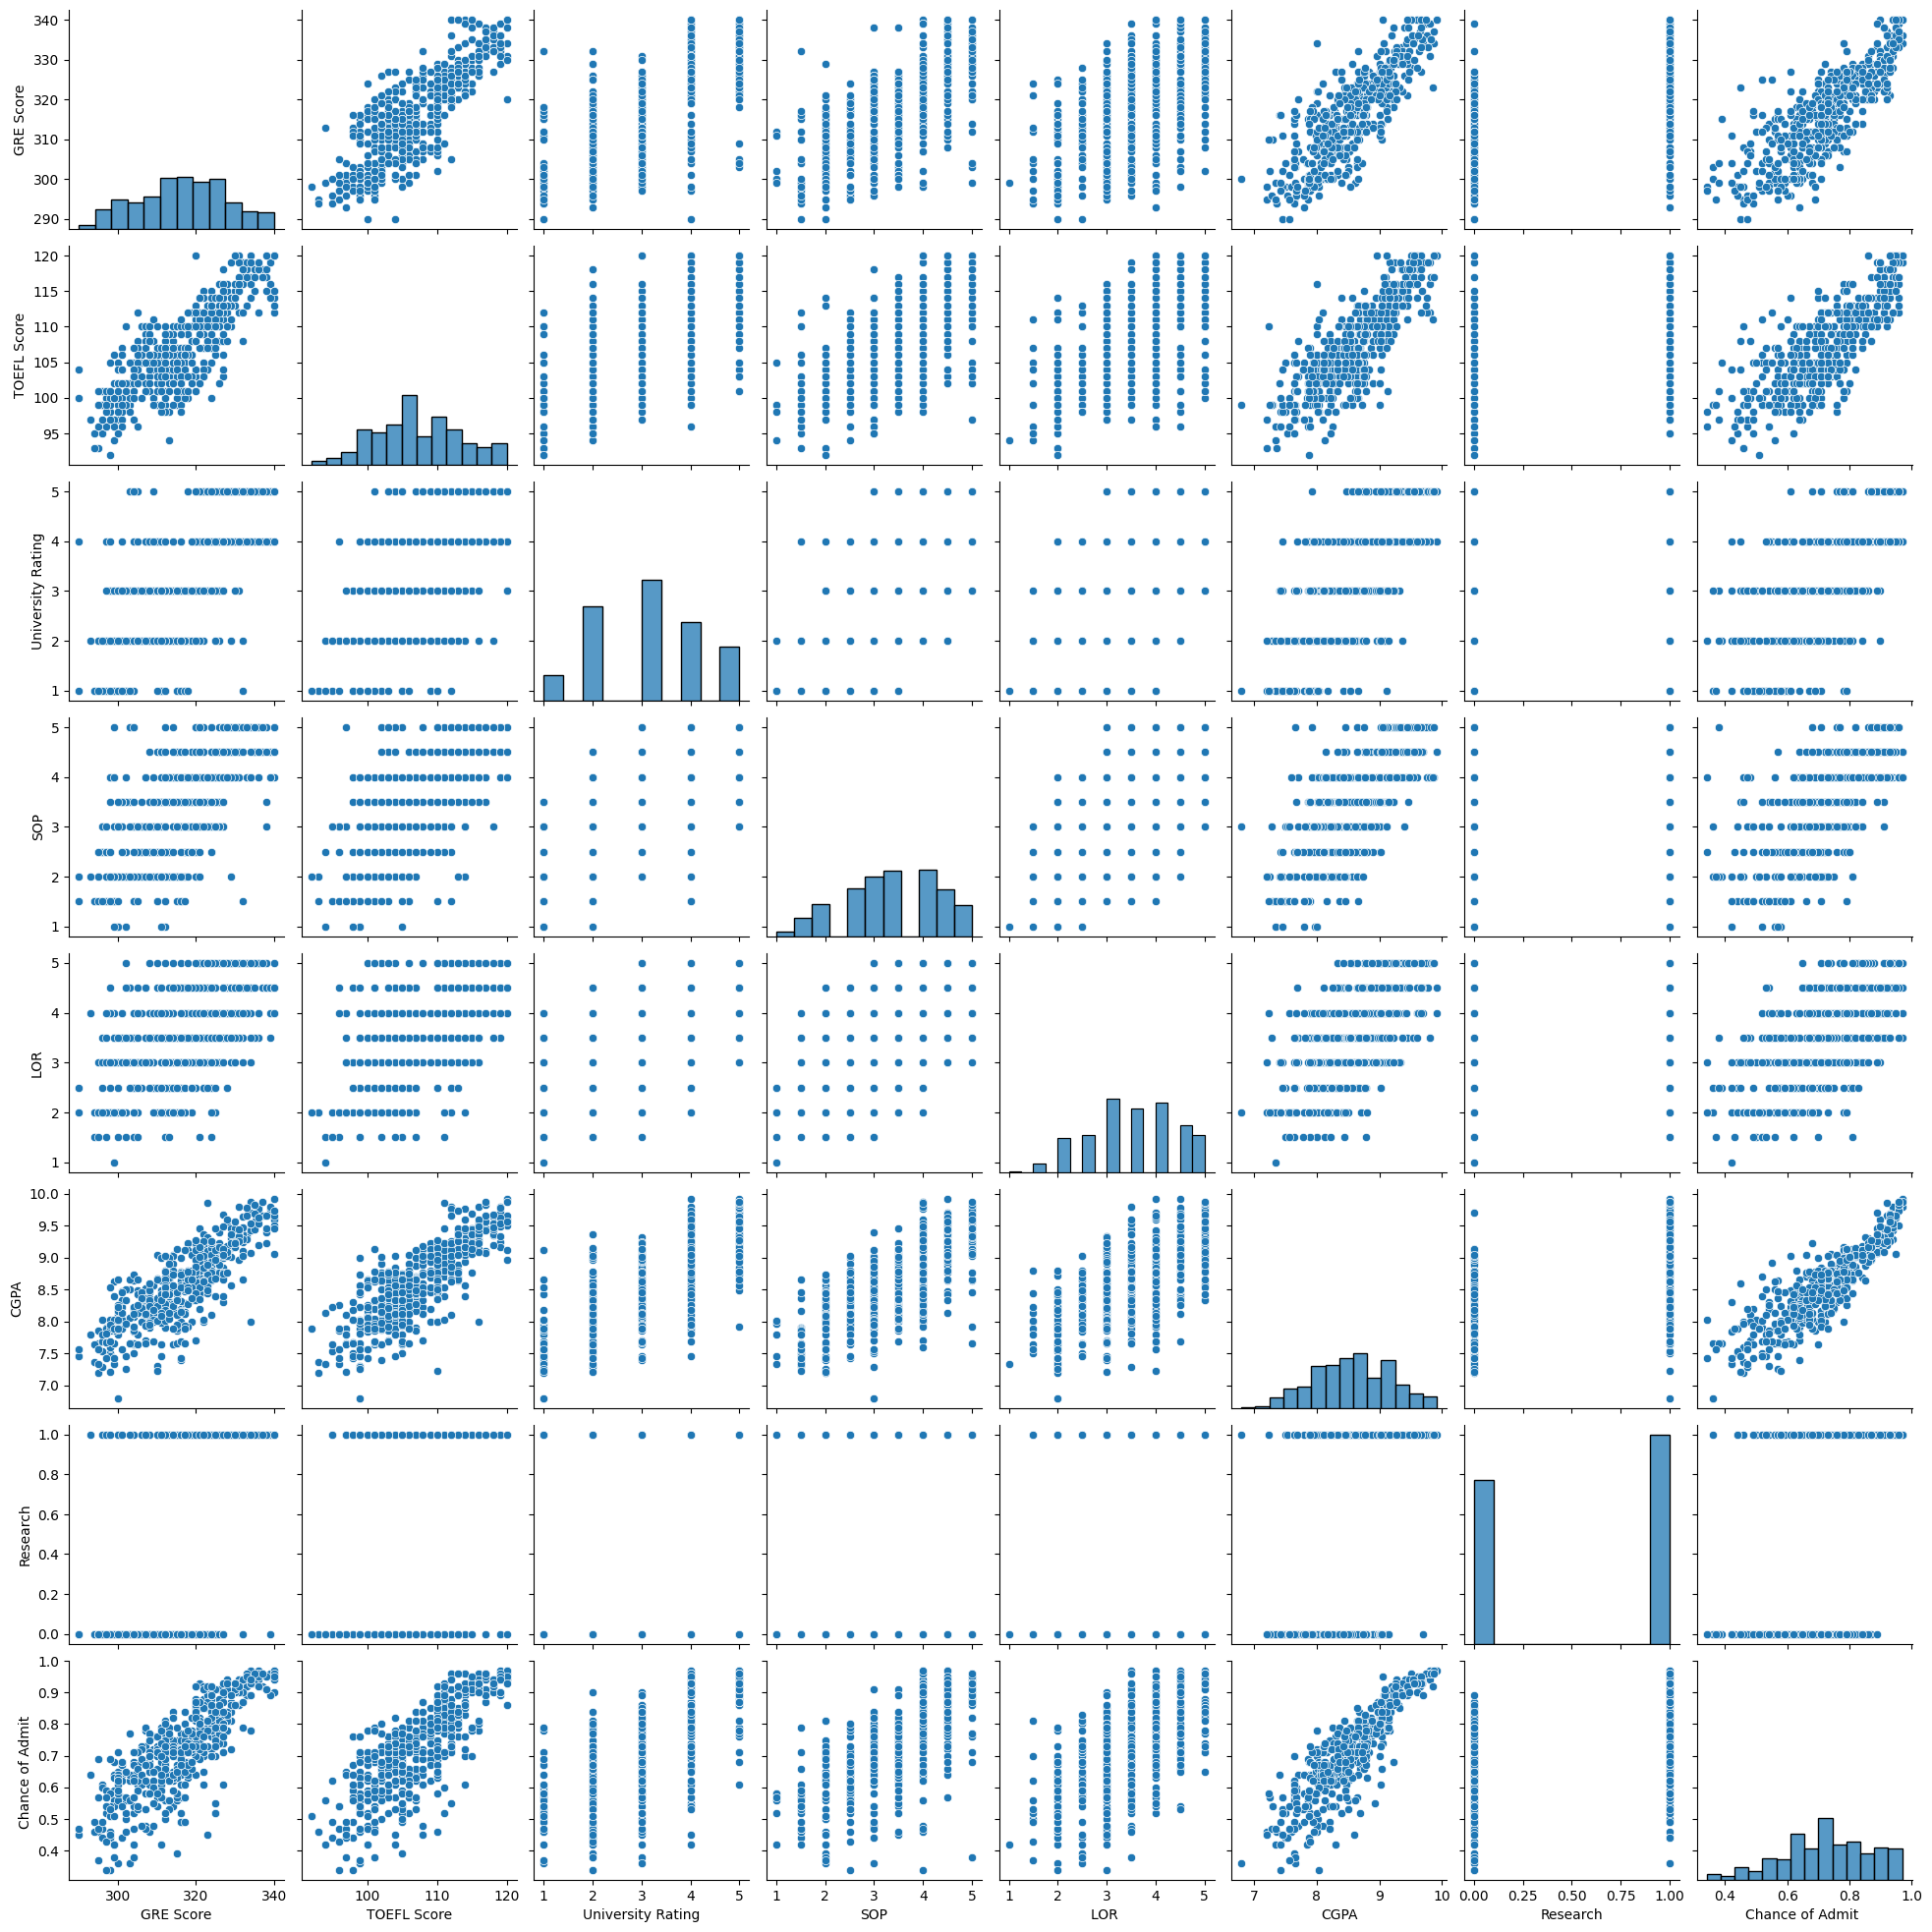

In [48]:
# Checking combined relationships between all numerical features.
sns.pairplot(df)
plt.show()

**Observation:**

The pairplot shows that GRE Score, TOEFL Score, and CGPA move together in an upward trend, indicating that students with strong academic performance tend to perform consistently across exams and coursework. Chance of Admit increases along with these features, confirming a multi-feature positive relationship.

# **Data Pre-Processing:**

In [49]:
# Checking is there any null values in our dataset w r t each row/col.
df.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


In [50]:
# Their is no null values in our dataset.
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**Observation:**

-- No missing values were found in the dataset, so no imputation technique was required. All columns already contain valid numerical data, so no encoding or conversion was necessary at this stage.


In [51]:
# There are no duplicates.
print(df.duplicated().sum())

0


**Observation:**

-- No duplicate rows are present in the dataset, so no duplicate removal was required.

In [52]:
# Checking Datatypes.
print(df.dtypes)

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


#**Feature Engineering:**

In [53]:
# Creating new engineered features to enhance model performance
df['Overall_Score'] = df['GRE Score'] + df['TOEFL Score']
df['SOP_LOR_Interaction'] = df['SOP'] * df['LOR ']

In [54]:
# Checking data after feature engineering.
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Overall_Score,SOP_LOR_Interaction
0,337,118,4,4.5,4.5,9.65,1,0.92,455,20.25
1,324,107,4,4.0,4.5,8.87,1,0.76,431,18.00
2,316,104,3,3.0,3.5,8.00,1,0.72,420,10.50
3,322,110,3,3.5,2.5,8.67,1,0.80,432,8.75
4,314,103,2,2.0,3.0,8.21,0,0.65,417,6.00


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Removing the target column before VIF calculation
vif_df =  df.drop('Chance of Admit ', axis=1)

In [57]:
# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = vif_df.columns
vif["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
print(vif)

               Feature         VIF
0            GRE Score         inf
1          TOEFL Score         inf
2    University Rating   21.772114
3                  SOP  188.794448
4                 LOR   181.228914
5                 CGPA  970.675239
6             Research    2.882992
7        Overall_Score         inf
8  SOP_LOR_Interaction  209.368373


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [58]:
# Removing engineered features causing multicollinearity
df = df.drop(['Overall_Score','SOP_LOR_Interaction'],axis=1)

**Feature Engineering (Attempt & Decision):**

We tried two features — Overall_Score = GRE + TOEFL and SOP_LOR_Interaction = SOP × LOR.

VIF showed they amplified multicollinearity without improving performance, so both were removed. The model proceeds with original features.

In [59]:
vif_col = df.drop('Chance of Admit ', axis=1)

In [60]:
# VIF on final selected features
vif = pd.DataFrame()
vif["Feature"] = vif_col.columns
vif["VIF"] = [variance_inflation_factor(vif_col.values, i) for i in range(vif_col.shape[1])]
vif

,Feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


**Observation:**

The VIF values for GRE Score, TOEFL Score, and CGPA are extremely high, indicating strong multicollinearity among these academic performance features.
This is expected because students who perform well in CGPA usually also score high in GRE and TOEFL, meaning these variables carry overlapping information.

However, GRE and TOEFL are critical real-world admission factors, especially for evaluating applicants from different educational backgrounds.
Therefore, instead of removing these features, we retain them and address the multicollinearity problem using Ridge Regression (L2 regularization),
which stabilizes the coefficients without dropping meaningful predictors.


In [61]:
# Final Feature Selection (Independent Variables and Target Variable)
X = df[['GRE Score','TOEFL Score','CGPA', 'SOP', 'LOR ', 'University Rating', 'Research']]
y = df['Chance of Admit ']

**Observation:**

We selected GRE Score, TOEFL Score, CGPA, SOP, LOR, University Rating, and Research as the final independent features, and 'Chance of Admit' as the target variable. These features collectively represent academic performance, profile strength, university competitiveness, and research exposure.


In [62]:
# Checking the features.
X.head()

,GRE Score,TOEFL Score,CGPA,SOP,LOR,University Rating,Research
0,337,118,9.65,4.5,4.5,4,1
1,324,107,8.87,4.0,4.5,4,1
2,316,104,8.00,3.0,3.5,3,1
3,322,110,8.67,3.5,2.5,3,1
4,314,103,8.21,2.0,3.0,2,0


In [63]:
# Checking target column.
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


# **Model Building:**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 7)
(400,)
(100, 7)
(100,)


**Observation:**

The dataset was successfully split into training and testing sets using an 80:20 ratio.
The training data will be used to learn model parameters, while the testing data will be used to evaluate model performance.

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
# Fit the scaler on training data and tranform both train and test sets
# Scaling the feature values to ensure all features contribute equally in model training
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Observation:**

Scaling was applied to standardize all feature values so that no single feature dominates the model due to its scale.
The scaler was fit only on the training data and then applied to the test data to avoid data leakage and ensure a fair evaluation.



In [70]:
X_train

array([[ 0.38998634,  0.6024183 ,  0.4150183 , ...,  0.56498381,
        -0.09829757,  0.89543386],
       [-0.06640493,  0.6024183 , -0.06785154, ...,  1.65149114,
         0.7754586 , -1.11677706],
       [-1.25302222, -0.87691722, -0.13445427, ..., -0.52152352,
        -0.09829757, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -2.2157898 , ..., -1.60803084,
        -1.8458099 , -1.11677706],
       [-0.7053527 , -0.38380538, -1.49981038, ...,  0.56498381,
        -0.97205374, -1.11677706],
       [-0.24896144, -0.21943477, -0.55072138, ...,  0.02173015,
        -0.97205374, -1.11677706]])

In [71]:
X_test

array([[ 1.57660363,  1.42427137,  1.59721688,  0.63397891,  0.02173015,
         0.7754586 ,  0.89543386],
       [-0.24896144,  0.10930646,  0.76468267,  1.14116204,  0.56498381,
         0.7754586 ,  0.89543386],
       [-0.15768318, -0.38380538, -1.54976243, -1.39475361, -1.06477718,
        -0.97205374, -1.11677706],
       [-0.43151794,  0.27367707,  0.18190872, -0.38038735, -0.52152352,
        -0.09829757, -1.11677706],
       [ 0.8463776 ,  0.76678891,  0.78133336,  0.12679578, -0.52152352,
        -0.09829757,  0.89543386],
       [ 1.12021236,  0.6024183 ,  1.08104567,  1.14116204,  0.56498381,
         0.7754586 ,  0.89543386],
       [-2.43963951, -1.20565845, -1.69961859, -1.90193674, -1.60803084,
        -1.8458099 , -1.11677706],
       [-1.43557873, -0.21943477, -0.18440633, -0.88757048, -0.52152352,
         0.7754586 , -1.11677706],
       [ 0.11615158,  0.27367707,  1.06439499,  0.12679578,  0.56498381,
        -0.09829757,  0.89543386],
       [ 0.29870808,  0.7667

In [72]:
print(X_train.shape)
print(X_test.shape)

(400, 7)
(100, 7)


**Observation:**

The shapes of X_train and X_test remain consistent after scaling, indicating that the scaling process did not alter the structure of the feature matrices.

# Training the Linear Regression model on the scaled training dataset:


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
# Creating the Linear Regression model.
model = LinearRegression()

In [75]:
model

LinearRegression()

In [76]:
# Training the Linear Regression model using the training data.
model.fit(X_train,y_train)

LinearRegression()

**Observation:**

The Linear Regression model has been successfully trained on the scaled training data. The model has learned the relationship between the input features and the target variable.

In [77]:
# Making predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

#**Model Evaluation:**

In [78]:
from sklearn.metrics import r2_score

In [79]:
# Evaluating model performance
r2 = r2_score(y_test,y_pred)
r2

0.8188432567829628

**Observation:**

The R² score is 0.818, it indicates that approximately 82% of the variation in the Chance of Admit is explained by the model.
This shows that the model has a strong predictive performance and fits the data well.

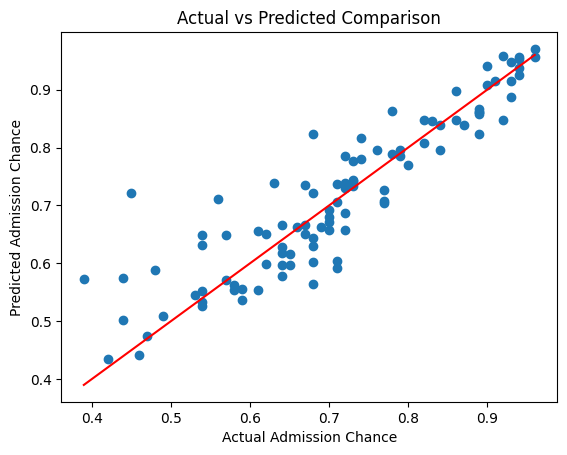

In [99]:
plt.scatter(y_test, y_pred)
line = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(line, line, color='red')
plt.xlabel('Actual Admission Chance')
plt.ylabel('Predicted Admission Chance')
plt.title('Actual vs Predicted Comparison')
plt.show()

**Observation:**

Most points lie close to the diagonal reference line, indicating good prediction accuracy.
This confirms that the Linear Regression model is performing well.


In [81]:
# Creating a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
361,0.93,0.914575
73,0.84,0.795181
374,0.39,0.572660
155,0.77,0.707370
104,0.74,0.815883


In [82]:
results = results.reset_index(drop=True)
print(results.sample(10))

    Actual  Predicted
24    0.74   0.780276
44    0.90   0.941129
27    0.82   0.847415
2     0.39   0.572660
39    0.56   0.710573
37    0.94   0.957190
64    0.46   0.440859
20    0.67   0.665482
25    0.68   0.602487
13    0.94   0.936772


**Observation:**

The prediction values are reasonably close to the actual values, showing that the model is learning the relationship, though some prediction error is present as expected.


# **Coefficient Interpretation:**


In [83]:
coeff = pd.DataFrame(model.coef_, X.columns, columns=['Linear Coefficient'])
coeff

,Linear Coefficient
GRE Score,0.026671
TOEFL Score,0.018226
CGPA,0.067581
SOP,0.001788
LOR,0.015866
University Rating,0.002940
Research,0.011940


**Linear Coefficient Interpretation:**

CGPA, GRE Score, and TOEFL Score have the highest positive coefficients, indicating that academic performance is the strongest factor influencing the chance of admission. Students with higher CGPA and higher standardized
test scores (GRE and TOEFL) have a significantly higher probability of getting admitted.

LOR and SOP have smaller positive coefficients, meaning they influence the admission decision, but their impact is moderate compared to academic scores. Strong letters of recommendation and a well-written
statement of purpose help, but they do not carry the same weight as academic metrics.

University Rating and Research have a positive but relatively small effect. This indicates that applying to higher-rated universities and having research experience improves the admission chance, but not as strongly
as GRE, TOEFL, and CGPA.




# **Assumptions:**

In [84]:
# Calculating residuals (Actual - Predicted)
residuals = y_test - y_pred

In [85]:
residuals

,Chance of Admit
361,0.015425
73,0.044819
374,-0.182660
155,0.062630
104,-0.075883
...,...
347,-0.015631
86,0.033357
75,-0.065988
438,-0.064694


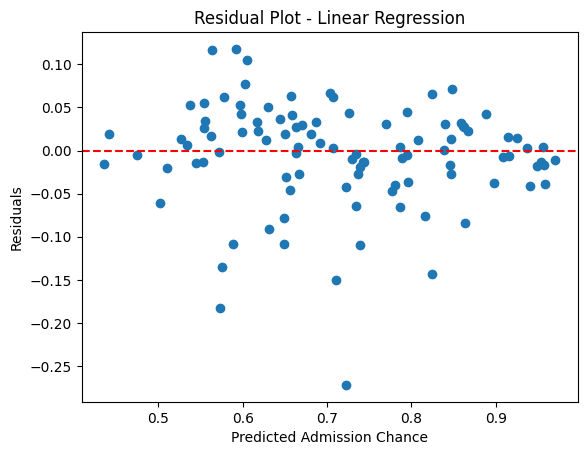

In [86]:
# Residual Plot
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red',linestyle='--')
plt.xlabel("Predicted Admission Chance")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()

**Observation:**

The residuals are randomly scattered around zero without any visible pattern.
This indicates that the linearity assumption is reasonable and the variance of errors is constant
(homoscedasticity is satisfied). Therefore, a linear model is appropriate for this data.



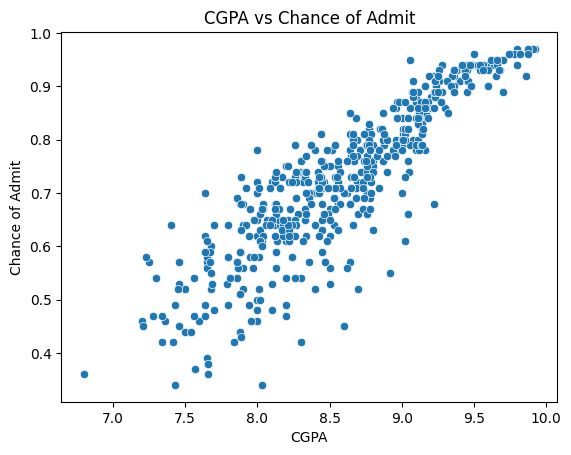

In [87]:
# Checking linear relationship between CGPA and Chance of Admit
sns.scatterplot(x=df['CGPA'], y=df['Chance of Admit '])
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.title("CGPA vs Chance of Admit")
plt.show()

**Observation:**

There is a clear upward trend between CGPA and Chance of Admit, confirming a positive linear relationship.



In [88]:
import scipy.stats as stats

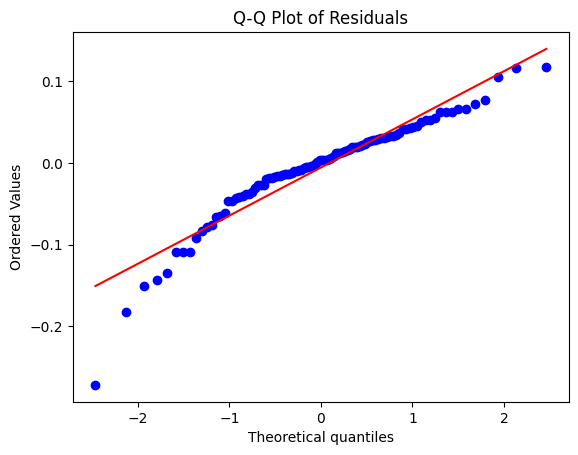

In [89]:
# Q-Q plot to check whether the residuals follow a normal distribution
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

**Observation:**

The residual points generally follow the reference line, indicating that the residuals are approximately
normally distributed. This satisfies the normality assumption of linear regression.


#**Ridge Regression:**

In [90]:
from sklearn.linear_model import Ridge

In [91]:
# Creating Ridge Regression model with regularization strength alpha = 1.0
ridge = Ridge(alpha=1.0)
ridge

Ridge()

In [92]:
# Training Ridge Regression model (applies L2 regularization to stabilize coefficients under multicollinearity)
ridge.fit(X_train, y_train)

Ridge()

In [93]:
# Predicting on test data
y_pred_ridge = ridge.predict(X_test)

In [94]:
y_pred_ridge

array([0.91421984, 0.79500523, 0.57312558, 0.70715887, 0.81563898,
       0.86193529, 0.47458935, 0.64834145, 0.82326153, 0.8073473 ,
       0.7219803 , 0.72573285, 0.65682446, 0.93674345, 0.82368283,
       0.5096502 , 0.83944997, 0.59716395, 0.53330335, 0.5718811 ,
       0.66556695, 0.55341577, 0.72227494, 0.79505875, 0.780281  ,
       0.60245293, 0.94828279, 0.84741333, 0.62784767, 0.74358208,
       0.5556498 , 0.72981698, 0.54499176, 0.86094886, 0.65754431,
       0.73720042, 0.55395039, 0.95704805, 0.64387052, 0.71060898,
       0.9700221 , 0.57506196, 0.67056011, 0.85832293, 0.94084723,
       0.57772058, 0.95811299, 0.839033  , 0.79605353, 0.92561199,
       0.88783125, 0.56381135, 0.70377322, 0.52690138, 0.95357319,
       0.5981566 , 0.95545667, 0.73908587, 0.66236998, 0.50159755,
       0.62910715, 0.68012345, 0.59875846, 0.5928312 , 0.440936  ,
       0.58938993, 0.86660807, 0.89774293, 0.65814732, 0.70635182,
       0.61772125, 0.78588096, 0.69113132, 0.56317936, 0.55388

In [95]:
# Evaluating model performance
r2_ridge = r2_score(y_test, y_pred_ridge)

In [96]:
# Checking R2 score for ridge model.
print("Ridge Regression R²:", r2_ridge)

Ridge Regression R²: 0.8187885396675397


**Observation:**

Ridge Regression achieves nearly the same R² score as Linear Regression, indicating that the predictive performance is preserved.
However, Ridge stabilizes the coefficients by controlling the effects of multicollinearity, making the model more reliable for interpretation.


In [97]:
# Ridge Regression Coefficients
ridge_coeff = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Ridge Coefficient'])
ridge_coeff

,Ridge Coefficient
GRE Score,0.026789
TOEFL Score,0.018355
CGPA,0.067011
SOP,0.001937
LOR,0.015893
University Rating,0.003046
Research,0.011949


**Ridge Coefficient Interpretation:**

CGPA, GRE Score, and TOEFL Score have the highest positive coefficients, indicating that academic performance
is the strongest factor influencing admission chances. Students with higher CGPA and strong standardized test scores
(GRE and TOEFL) have a significantly higher probability of being admitted.

LOR and SOP have smaller positive coefficients, meaning they contribute to the admission decision, but their effect
is moderate compared to academic performance.

University Rating and Research experience also show positive coefficients, suggesting that applying to highly
rated universities and having research experience improves admission chances, but the influence is relatively
smaller than the academic metrics.

In [98]:
# Compare coefficients between linear_model and ridge.
coeff_compare = pd.concat([coeff, ridge_coeff], axis=1)
coeff_compare

,Linear Coefficient,Ridge Coefficient
GRE Score,0.026671,0.026789
TOEFL Score,0.018226,0.018355
CGPA,0.067581,0.067011
SOP,0.001788,0.001937
LOR,0.015866,0.015893
University Rating,0.002940,0.003046
Research,0.011940,0.011949


**Coefficient Interpretation between linear & ridge:**

The Ridge coefficients are very close to the Linear Regression coefficients, but slightly smaller in magnitude.
This indicates that Ridge Regression successfully reduced the effect of multicollinearity by shrinking weights
without changing the direction or importance of the features.

CGPA remains the dominant predictor of admission chances.
Research, LOR, SOP, and University Rating continue to have moderate positive effects,
but Ridge makes their influence slightly more stable and reliable.


#**Conclusion:**

This project focused on predicting the chance of admission to top universities based on academic performance and profile-related factors. The exploratory analysis showed that GRE Score, TOEFL Score, and CGPA are strongly associated
with admission probability, indicating that academic performance is the most influential factor in the selection process.
Meanwhile, SOP, LOR, University Rating, and Research experience contribute positively, but their effects are comparatively smaller.

A Linear Regression model was initially trained and achieved an R² score of approximately 0.82, indicating strong predictive performance. However, due to multicollinearity among GRE, TOEFL, and CGPA, Ridge Regression (L2 Regularization) was applied to stabilize the coefficients. Ridge Regression preserved the same predictive accuracy while producing more reliable and
consistent coefficient values, making it the preferred final model.

Overall, academic excellence is the dominant determinant of admission probability, supported to a lesser extent by profile strength and research exposure. Ridge Regression is selected as the final model due to its ability to handle multicollinearity while maintaining interpretability and performance.

